# SMS Classifier 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.metrics import accuracy_score, precision_score

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin-1', usecols=['v1', 'v2'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# Renaming the coloumn
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [7]:
df.head()  ## target = {0:ham, 1:spam}

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

403

In [10]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

## EDA

In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

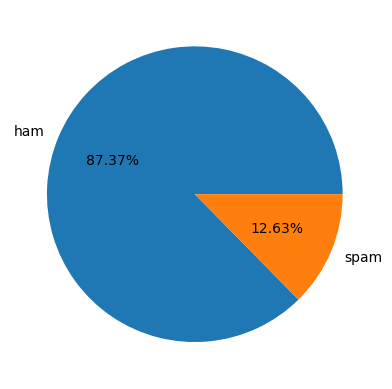

In [14]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f%%")
plt.show()

In [15]:
df['num_characters'] = df['text'].apply(len)

In [16]:
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [17]:
df['num_sentances'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df[['num_characters', 'num_words', 'num_sentances']].describe()

,num_characters,num_words,num_sentances
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentances']].describe()

,num_characters,num_words,num_sentances
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentances']].describe()

,num_characters,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


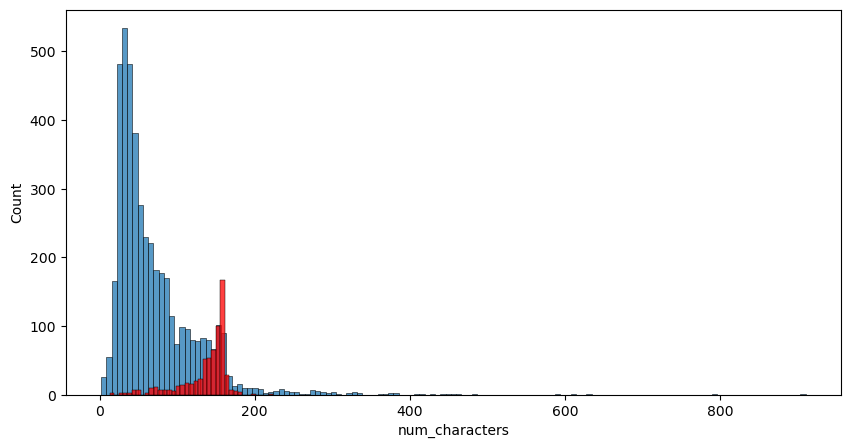

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

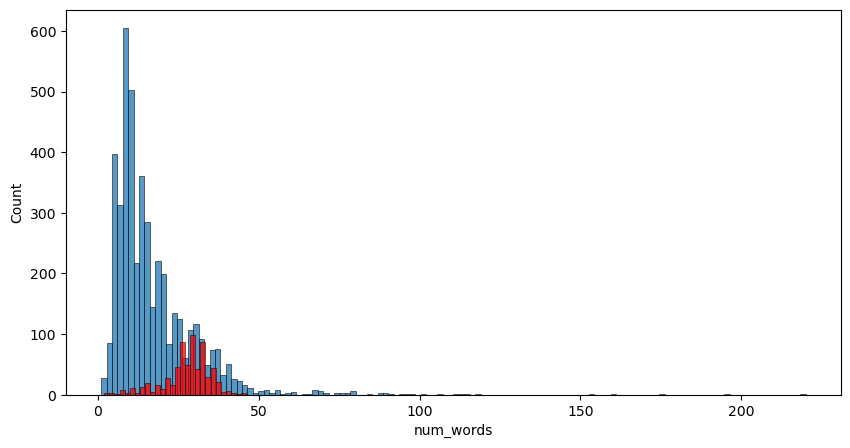

In [23]:
plt.figure(figsize=(10,5))

sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

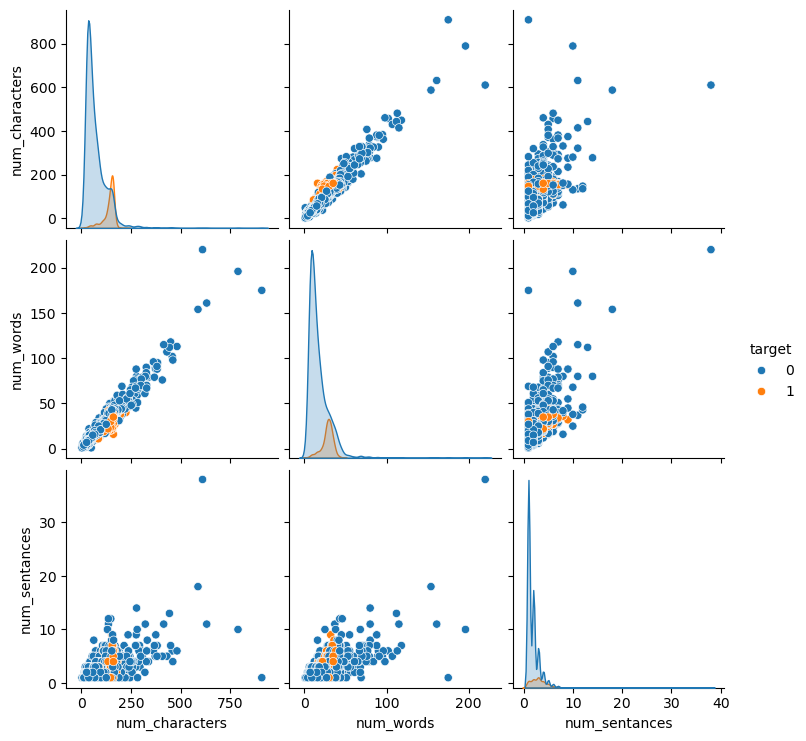

In [24]:
sns.pairplot(df, hue='target')
plt.show()

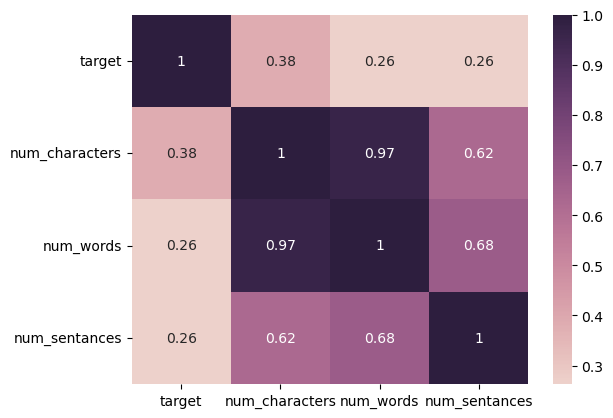

In [25]:
cm = df.corr()
sns.heatmap(cm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

## Text Preprocessing

In [26]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re 

In [27]:
def transfrom_text(t):
    text = re.sub('[^a-zA-Z0-9]', ' ', t)
    text = text.replace('"', '')
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    
    return text 

In [28]:
df['transformed_text'] = df['text'].astype(str).apply(transfrom_text)

In [29]:
df.head(2)

,target,text,num_characters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

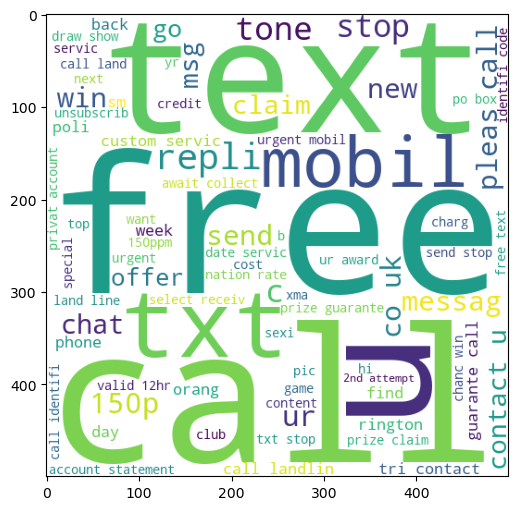

In [31]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

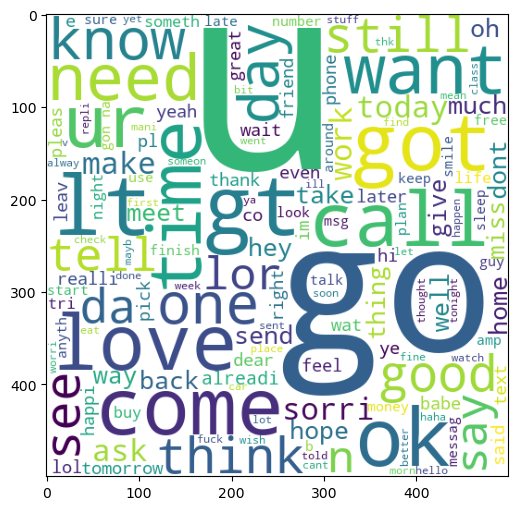

In [32]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.show()

In [33]:
msg = df[df['target'] == 1]['transformed_text'].tolist()

spam_corpus = []
for m in msg:
    for word in m.split():
        spam_corpus.append(word)

len(spam_corpus)

11754

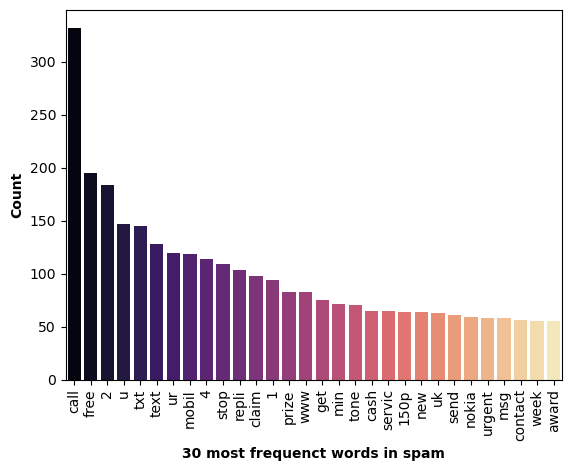

In [34]:
from collections import Counter
spam_common_30_words =  pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x=spam_common_30_words[0], y=spam_common_30_words[1], hue=spam_common_30_words[0], palette="magma", legend=False)
plt.xticks(rotation = 'vertical')
plt.xlabel("30 most frequenct words in spam", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()

In [35]:
msg = df[df['target'] == 0]['transformed_text'].tolist()

ham_corpus = []
for m in msg:
    for word in m.split():
        ham_corpus.append(word)

len(ham_corpus)

36321

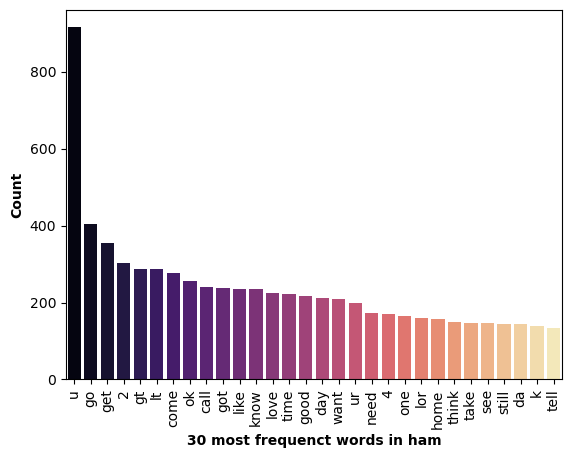

In [36]:
from collections import Counter
ham_common_30_words =  pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=ham_common_30_words[0], y=ham_common_30_words[1], hue=ham_common_30_words[0], palette="magma", legend=False)
plt.xticks(rotation = 'vertical')
plt.xlabel("30 most frequenct words in ham", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer()

X = cv.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [38]:
X.shape

(5169, 7159)

In [39]:
y.shape

(5169,)

## Spliting the dataset into Train and Test Set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model Building

In [41]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

In [42]:
bnb = BernoulliNB()
lrc = LogisticRegression()
svc = SVC (kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [43]:
clfs = {'NB':bnb, 'LR':lrc, 'SVC':svc, 'KNN':knc, 'DT':dtc, 'RF':rfc, 'XGB':xgb}

In [44]:
def Train_Classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [45]:
accuracy_score_list = []
precision_score_list = []

for name, clf in clfs.items():
    a, p = Train_Classifier(clf, X_train, y_train, X_test, y_test)

    accuracy_score_list.append(a)
    precision_score_list.append(p)

In [46]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy': accuracy_score_list, 'Precision': precision_score_list})

In [47]:
performance_df.round(2).sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision
3,KNN,0.90,1.00
5,RF,0.97,1.00
1,LR,0.97,0.99
6,XGB,0.97,0.97
0,NB,0.96,0.96
4,DT,0.93,0.94
2,SVC,0.92,0.70


In [48]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(bnb, f)

In [49]:
transfrom_sms = transfrom_text('You have been selected as the winner of our exclusive promotion. You have won a brand new [Fictional Product] and a cash prize of $10,000! To claim your rewards, click on the link below')

    # Vectorize
vect_sms = cv.transform([transfrom_sms]) 

    # Predict
pred = bnb.predict(vect_sms)[0]
     
if pred == 1 :
    print("Email is Spam.")
elif pred == 0:
    print("Email is not Spam.")
print()

Email is Spam.



#### `Conclusion:`After comparing the accuracy and precision of all the models, it is evident that the Naive Bayes model performs better with unknown text. It achieves 96% precision and 96% accuracy.